In [9]:
# coding:utf-8
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


%matplotlib inline


In [10]:
train_big_table = pd.read_csv('./data/train_big_table.csv',encoding='utf-8',index_col = False, delimiter='\t')
test_big_table = pd.read_csv('./data/test_big_table.csv',encoding='utf-8',index_col = False, delimiter='\t')
test_big_table.drop_duplicates(inplace=True)
train_big_table.drop_duplicates(inplace=True)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,25,26,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
train_big_table['statis_del'] = train_big_table['satisfied']
train_big_table.loc[(train_big_table['statis_del']==0)&(train_big_table['delivered']==1),['statis_del']]=0.3

In [12]:
jd_sub_series = train_big_table['jd_sub_type'].value_counts()
train_big_table.loc[train_big_table['jd_sub_type'].isin(jd_sub_series[jd_sub_series==1].index.tolist()),['jd_sub_type']]='小众'

In [13]:
jd_sub_action_series = train_big_table.groupby(['jd_sub_type'])['browsed'].count()
jd_sub_action =pd.DataFrame({'jd_sub_type':jd_sub_action_series.index, 'jd_sub_pos_cont':jd_sub_action_series.values})
jd_sub_action['jd_sub_browsed_rate'] = train_big_table.groupby(['jd_sub_type'])['browsed'].mean().values
jd_sub_action['jd_sub_delivered_rate'] = train_big_table.groupby(['jd_sub_type'])['delivered'].mean().values
jd_sub_action['jd_sub_satisfied_rate'] = train_big_table.groupby(['jd_sub_type'])['satisfied'].mean().values
jd_sub_action['jd_sub_statis_del_rate'] = train_big_table.groupby(['jd_sub_type'])['statis_del'].mean().values
jd_sub_action['jd_sub_satisfied_cont'] = train_big_table.groupby(['jd_sub_type'])['satisfied'].sum().values
jd_sub_action['jd_sub_delivered_cont'] = train_big_table.groupby(['jd_sub_type'])['delivered'].sum().values
jd_sub_action['jd_sub_browsed_cont'] = train_big_table.groupby(['jd_sub_type'])['browsed'].sum().values
jd_sub_action['jd_sub_satisfied_conv_rate'] = jd_sub_action['jd_sub_satisfied_cont'] / jd_sub_action['jd_sub_delivered_cont']
jd_sub_action['jd_sub_delivered_conv_rate'] = jd_sub_action['jd_sub_delivered_cont'] / jd_sub_action['jd_sub_browsed_cont']
jd_sub_action.loc[jd_sub_action['jd_sub_satisfied_conv_rate'].isnull(),'jd_sub_satisfied_conv_rate']=0
jd_sub_action.loc[jd_sub_action['jd_sub_delivered_conv_rate'].isnull(),'jd_sub_delivered_conv_rate']=0
train_big_table = pd.merge(train_big_table,jd_sub_action,how="left",on="jd_sub_type")
test_big_table = pd.merge(test_big_table,jd_sub_action,how="left",on="jd_sub_type")

In [17]:
train_big_table[train_big_table['jd_sub_type']=='小众'][['jd_sub_type','jd_sub_pos_cont','jd_sub_browsed_rate','jd_sub_delivered_rate','jd_sub_satisfied_rate','jd_sub_satisfied_conv_rate','jd_sub_delivered_conv_rate','jd_sub_statis_del_rate']].values[0]

array(['小众', 42, 0.14285714285714285, 0.047619047619047616,
       0.023809523809523808, 0.5, 0.3333333333333333,
       0.030952380952380953], dtype=object)

In [18]:
test_big_table.loc[test_big_table['jd_sub_pos_cont'].isnull(),['jd_sub_type','jd_sub_pos_cont','jd_sub_browsed_rate','jd_sub_delivered_rate','jd_sub_satisfied_rate','jd_sub_satisfied_conv_rate','jd_sub_delivered_conv_rate','jd_sub_statis_del_rate']] = train_big_table[train_big_table['jd_sub_type']=='小众'][['jd_sub_type','jd_sub_pos_cont','jd_sub_browsed_rate','jd_sub_delivered_rate','jd_sub_satisfied_rate','jd_sub_satisfied_conv_rate','jd_sub_delivered_conv_rate','jd_sub_statis_del_rate']].values[0]
test_big_table[test_big_table['jd_sub_pos_cont'].isnull()]

,user_id,jd_no,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,...,jd_sub_pos_cont,jd_sub_browsed_rate,jd_sub_delivered_rate,jd_sub_satisfied_rate,jd_sub_statis_del_rate,jd_sub_satisfied_cont,jd_sub_delivered_cont,jd_sub_browsed_cont,jd_sub_satisfied_conv_rate,jd_sub_delivered_conv_rate


In [19]:
cur_jd_action_series = train_big_table.groupby(['cur_jd_type'])['browsed'].count()
cur_jd_action =pd.DataFrame({'cur_jd_type':cur_jd_action_series.index, 'cur_jd_pos_cont':cur_jd_action_series.values})
cur_jd_action['cur_jd_browsed_rate'] = train_big_table.groupby(['cur_jd_type'])['browsed'].mean().values
cur_jd_action['cur_jd_delivered_rate'] = train_big_table.groupby(['cur_jd_type'])['delivered'].mean().values
cur_jd_action['cur_jd_satisfied_rate'] = train_big_table.groupby(['cur_jd_type'])['satisfied'].mean().values
cur_jd_action['cur_jd_satisfied_cont'] = train_big_table.groupby(['cur_jd_type'])['satisfied'].sum().values
cur_jd_action['cur_jd_delivered_cont'] = train_big_table.groupby(['cur_jd_type'])['delivered'].sum().values
cur_jd_action['cur_jd_browsed_cont'] = train_big_table.groupby(['cur_jd_type'])['browsed'].sum().values
cur_jd_action['cur_jd_satisfied_conv_rate'] = cur_jd_action['cur_jd_satisfied_cont'] / cur_jd_action['cur_jd_delivered_cont']
cur_jd_action['cur_jd_delivered_conv_rate'] = cur_jd_action['cur_jd_delivered_cont'] / cur_jd_action['cur_jd_browsed_cont']

cur_jd_action.loc[cur_jd_action['cur_jd_satisfied_conv_rate'].isnull(),'cur_jd_satisfied_conv_rate']=0
cur_jd_action.loc[cur_jd_action['cur_jd_delivered_conv_rate'].isnull(),'cur_jd_delivered_conv_rate']=0

test_big_table = pd.merge(test_big_table,cur_jd_action,how="left",on="cur_jd_type")
train_big_table = pd.merge(train_big_table,cur_jd_action,how="left",on="cur_jd_type")



In [20]:
test_big_table.loc[test_big_table['cur_jd_type']=='人力资源经理',['cur_jd_pos_cont','cur_jd_browsed_rate','cur_jd_delivered_rate','cur_jd_satisfied_rate','jd_sub_satisfied_conv_rate','jd_sub_delivered_conv_rate']] = 20275,0.276893,0.131591,0.051837,0.507463,0.443709
test_big_table.loc[test_big_table['cur_jd_type']=='市场策划/企划经理/主管',['cur_jd_pos_cont','cur_jd_browsed_rate','cur_jd_delivered_rate','cur_jd_satisfied_rate','jd_sub_satisfied_conv_rate','jd_sub_delivered_conv_rate']] = 480,0.258333,0.139583,0.052083,0.373134,0.540323
test_big_table[test_big_table['cur_jd_pos_cont'].isnull()]

,user_id,jd_no,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,...,jd_sub_delivered_conv_rate,cur_jd_pos_cont,cur_jd_browsed_rate,cur_jd_delivered_rate,cur_jd_satisfied_rate,cur_jd_satisfied_cont,cur_jd_delivered_cont,cur_jd_browsed_cont,cur_jd_satisfied_conv_rate,cur_jd_delivered_conv_rate
21,0eafb4513f3911fe750c51e5f28f650c,e10f9235a994b2b3e5756e18ff43e686,613,"613,-,-",教育/培训/院校,教育/培训,600108000,快速消费品（食品/饮料/烟酒/日化）,NaN,1000115000,...,0.455524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,299c5db773f1901a2295d74ec8340a3e,bb67c4c2f2ccaaf6c5c2217d72eae97f,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.450174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,299c5db773f1901a2295d74ec8340a3e,99be989e2abd89c7a3d6e5fb5b0b5a63,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.448904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,299c5db773f1901a2295d74ec8340a3e,1af260204eb970b2c91a016249c1d0ad,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.489862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,299c5db773f1901a2295d74ec8340a3e,48899576844f41bcd9dec19f83de5ae4,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,299c5db773f1901a2295d74ec8340a3e,5e2b064ee27f18a891ac3854d4f62216,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.406504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,299c5db773f1901a2295d74ec8340a3e,964da9cb145b948ff617623411381960,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.390311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,299c5db773f1901a2295d74ec8340a3e,5b02c48534e5849e39f5655ce4ea0094,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.344334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,299c5db773f1901a2295d74ec8340a3e,b4ce44d3c2983e837d66c30271d623ca,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.489862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,299c5db773f1901a2295d74ec8340a3e,2d2c7aa60c924195063374e39d2dfbcc,702,"702,-,-","医药/生物工程,房地产/建筑/建材/工程",销售代表,400106000,房地产/建筑/建材/工程,NaN,0400106000,...,0.406504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train_big_table['start_date'].fillna('na',inplace=True)
test_big_table['start_date'].fillna('na',inplace=True)
train_big_table['end_date'].fillna('na',inplace=True)
test_big_table['end_date'].fillna('na',inplace=True)
train_big_table['start_date'] = train_big_table['start_date'].astype(str)
train_big_table['end_date'] = train_big_table['end_date'].astype(str)
test_big_table['start_date'] = test_big_table['start_date'].astype(str)
test_big_table['end_date'] = test_big_table['end_date'].astype(str)

In [22]:
from datetime import datetime

def remain_date(x):
    if  'N' in x :
        return 99999;
    elif 'na' in x:
        return -1
    else:
        d1 = datetime.strptime('20190327', "%Y%m%d")
        d2 = datetime.strptime(x, "%Y%m%d")
        return abs((d2 - d1).days)
    
train_big_table['remain_date'] = train_big_table['end_date'].apply(remain_date)
test_big_table['remain_date'] = test_big_table['end_date'].apply(remain_date)

In [23]:
def month_convert(x):
    if  'N' in x:
        return -1;
    elif 'na' in x:
        return -1
    else:
        if int(x[0:6])< 201804:
            return '201804'
        else:
            return x[0:6]

train_big_table['start_month'] = train_big_table['start_date'].apply(month_convert)
test_big_table['start_month'] = test_big_table['start_date'].apply(month_convert)

In [24]:


cross_feature_names = ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']


In [25]:
all_big_table = pd.concat([train_big_table,test_big_table])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [26]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm as tqdm
import lightgbm as lgb

In [31]:
def feature_select(target,*df_list):
    result = []
    cat_features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
         "cur_degree_id","city","jd_sub_type","start_month",
         "max_salary","min_salary","is_travel","min_years","min_edu_level",
         "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"]+cross_feature_names
    lbl_dict = {}
    for f in cat_features:
        lbl = LabelEncoder()
        lbl.fit(all_big_table[f].astype(str))
        lbl_dict[f] = lbl
    for df in df_list:
        features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums","cur_jd_browsed_rate",
                    "cur_jd_delivered_rate","cur_jd_satisfied_rate",
                    "jd_sub_browsed_rate","jd_sub_statis_del_rate",
                    "jd_sub_delivered_rate","jd_sub_satisfied_rate",
                    "start_month",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                    "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names

        x = df[features]
        if target in df.columns:
            y = df[target]
        else:
            y = None
        for f in cat_features:
            lbl = lbl_dict[f]
            x[f] = lbl.transform(x[f].astype(str))
        result.append((x,y))
    return result


In [32]:
from sklearn.model_selection import KFold

def cross_validate(param=dict(n_estimators=1000,metric="map",colsample_bytree=0.2,max_depth=7,importance_type="gain",device="gpu",gpu_platform_id=0,gpu_device_id=0)
                   ,n_folds=5,target="mix_sat"):
    train_users = train_big_table["user_id"].unique()
    folds = KFold(n_folds,shuffle=True,random_state=42)
    models = []
    test_pred = np.zeros(test_big_table.shape[0])
    scores = []
    for idx,(train_idx,valid_idx) in enumerate(folds.split(train_users)):
        t_user = train_users[train_idx]
        v_user = train_users[valid_idx]
        train_data = train_big_table[train_big_table["user_id"].isin(t_user)]
        valid_data = train_big_table[train_big_table["user_id"].isin(v_user)]
        train_group = train_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        valid_group = valid_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        test_group = test_big_table.groupby("user_id",as_index=False).count()["jd_no"].values
        
        result = feature_select(target,train_data,valid_data,test_big_table)
        t_x,t_y = result[0]
        v_x,v_y = result[1]
        test_x,_ = result[2]
        model = lgb.LGBMRanker(**param)
        print("Fold",idx,"-"*30)
        model.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
                  callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.03)]
                 )
        models.append(model)
        test_pred += model.predict(test_x)/n_folds
        scores.append(model.best_score_["valid_1"]["map@1"])
    print("mean score",np.mean(scores))
    return models,test_pred

In [33]:
test_big_table.shape

(25116, 86)

In [34]:
models,pred = cross_validate(target="mix_sat",param=dict(n_estimators=1000,metric="map",subsample=0.6,min_split_gain=10,colsample_bytree=0.6,max_depth=7,importance_type="gain",device="gpu",gpu_platform_id=0,gpu_device_id=0),n_folds=5)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 0 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's map@1: 0.244716	valid_1's map@1: 0.220245
[20]	training's map@1: 0.267241	valid_1's map@1: 0.219132
[30]	training's map@1: 0.273637	valid_1's map@1: 0.219132
[40]	training's map@1: 0.279755	valid_1's map@1: 0.212458
[50]	training's map@1: 0.291713	valid_1's map@1: 0.215795
[60]	training's map@1: 0.295328	valid_1's map@1: 0.213571
[70]	training's map@1: 0.299221	valid_1's map@1: 0.216908
[80]	training's map@1: 0.308398	valid_1's map@1: 0.220245
[90]	training's map@1: 0.313126	valid_1's map@1: 0.222469
[100]	training's map@1: 0.3198	valid_1's map@1: 0.224694
[110]	training's map@1: 0.324527	valid_1's map@1: 0.220245
Early stopping, best iteration is:
[13]	training's map@1: 0.259177	valid_1's map@1: 0.230256
Fold 1 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's map@1: 0.246107	valid_1's map@1: 0.205784
[20]	trai

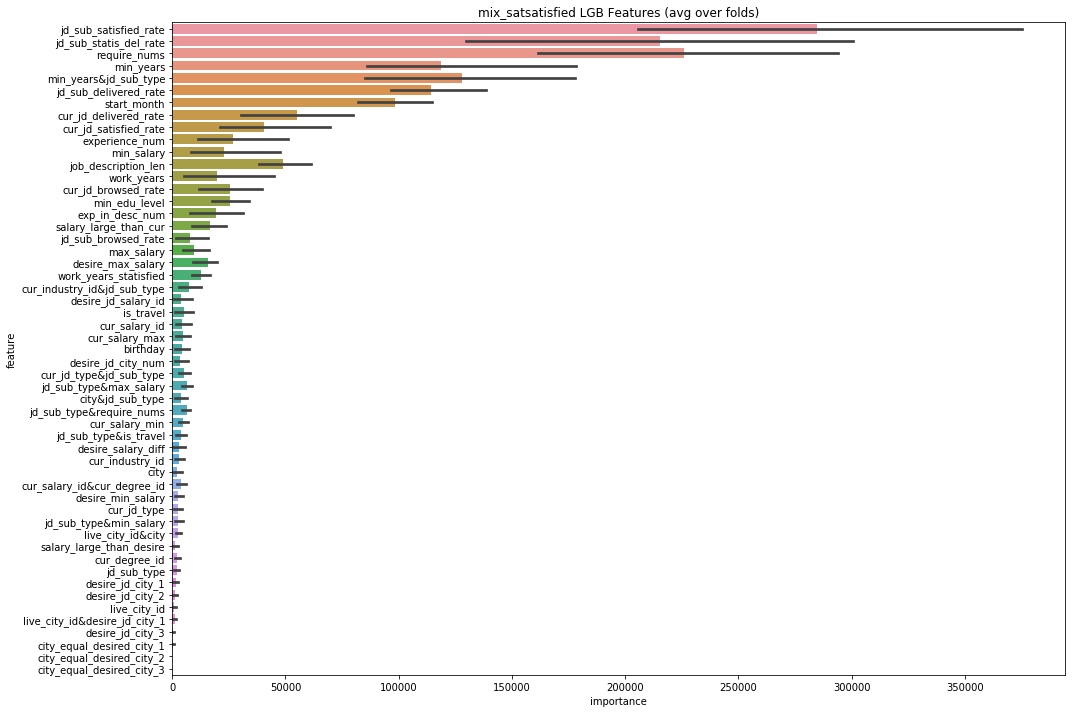

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame()
for idx,model in enumerate(models):
    fold_importance = pd.DataFrame()
    fold_importance["feature"] =["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums","cur_jd_browsed_rate",
                    "cur_jd_delivered_rate","cur_jd_satisfied_rate",
                    "jd_sub_browsed_rate","jd_sub_statis_del_rate",
                    "jd_sub_delivered_rate","jd_sub_satisfied_rate",
                    "start_month",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                    "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names

    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = idx
    feature_importance = pd.concat([feature_importance,fold_importance])
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False));
plt.title('mix_satsatisfied LGB Features (avg over folds)');

In [39]:
test_action = pd.read_csv("data/zhaopin_round1_user_exposure_A_20190723",delim_whitespace=True)
test_action.head()

,user_id,jd_no
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609
4,035b5c8e977d2f76628d9b7edfc95323,5bc733283200a5d7b5cf3eb45cde4db7


In [40]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
result[["user_id","jd_no","score"]].to_csv("submission2.csv",index=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
# 需要对结果进行去重
result[["user_id","jd_no","score"]].drop_duplicates().to_csv("submission2.csv",index=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
#work_years_statisfied=1
#is_edu_ok？ 1
#year&is_city_eq 